In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, multiclass
from gensvm import GenSVM
import pickle

np.random.seed(123)

In [2]:
def make_meshgrid(x, y, h=0.005):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, trainX=None, **params):
    if trainX is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()], trainX=trainX)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['Computer Modern'],
    "font.size": 14
})

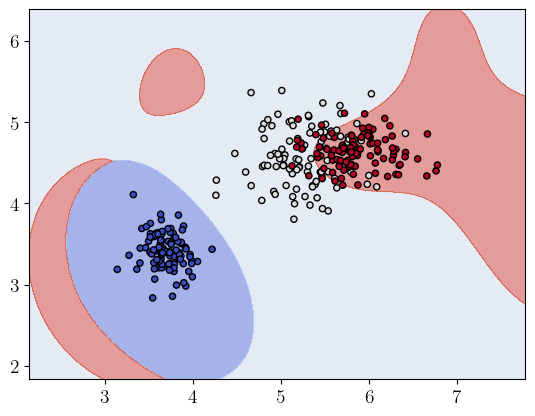

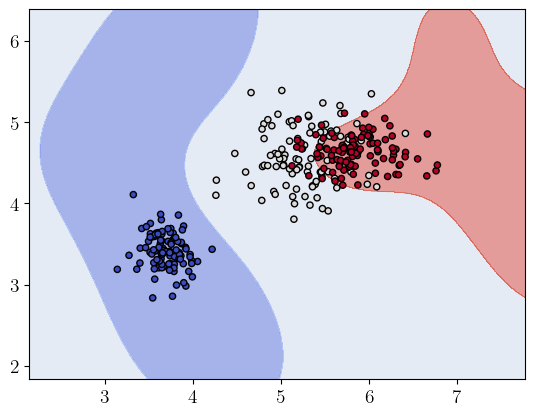

In [4]:
n_samples = 100
# uncomment if you want to generate a new dataset
"""X_train_p = [
    np.random.normal([3.7, 3.4], scale, size=(n_samples, 2)),
    np.random.normal([5.32, 4.62], [0.4, 0.4], size=(n_samples, 2)),
    np.random.normal([5.86, 4.62], [0.4, 0.2], size=(n_samples, 2))
]"""
with open('pickle/varying_p.pkl', 'rb') as d:
    X_train_p = pickle.load(d)

y_train_p = [
    [0] * n_samples,
    [1] * n_samples,
    [2] * (n_samples)
]

X_p = np.concatenate(X_train_p)
X0_p = X_p[:, 0]
X1_p = X_p[:, 1]
y_p = np.concatenate(y_train_p)

clf = GenSVM(p=1, kernel='rbf')
clf.fit(X_p, y_p)

xx, yy = make_meshgrid(X0_p, X1_p)
plot_contours(plt, clf, xx, yy, X_p, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(X0_p, X1_p, c=y_p, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.savefig('p-parameter-1.pdf')
plt.show()

clf = GenSVM(p=2, kernel='rbf')
clf.fit(X_p, y_p)

xx, yy = make_meshgrid(X0_p, X1_p)
plot_contours(plt, clf, xx, yy, X_p, cmap=plt.cm.coolwarm, alpha=0.5)
plt.scatter(X0_p, X1_p, c=y_p, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.savefig('p-parameter-2.pdf')
plt.show()